In [2]:
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from IPython.display import Image
import math

# · Segmentación

![ejemplo](jupyter_p2/segej.png)

132.07968328502162
136.15907196500825
140.05479129075383
143.615561488244
146.31816036768942
148.85726154416488
150.4356232068577


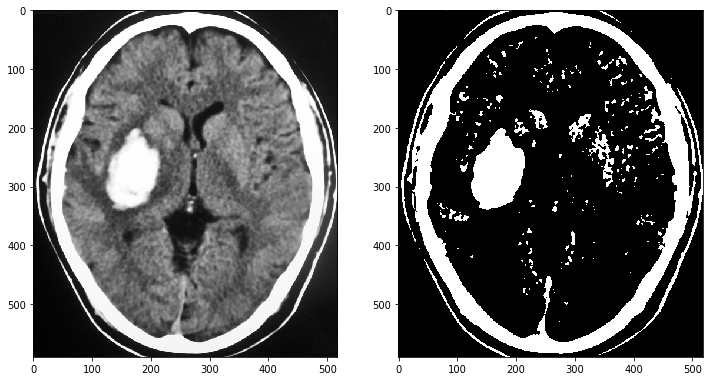

In [40]:
def BIN(IM):
    T = (1.0 * IM.min() + 1.0 * IM.max()) / 2.0 #Ojo que IM es tipo byte
    nF, nC = IM.shape  
    for it in range(100):    
        n1, n2, p1, p2 = 0, 0, 0, 0
        for f in range(nF):
            for c in range(nC):
                if IM[f, c] > T:
                    p1 = p1 + IM[f, c]
                    n1 = n1 + 1
                else:
                    p2 = p2 + IM[f, c]
                    n2 = n2 + 1
        p1 = p1 / n1
        p2 = p2 / n2
        TT = (p1 + p2) / 2
        if abs((TT - T)/ T) <0.01: #Se detiene cuando delta menor a 1%
            break
        T = TT        
        print(T)
    IM = 255 * (IM[:, :] > T) #Binarización
    return IM
#****************************************************


IM=img.imread("jupyter_p2/brain_tumor.jpg")

FIG, SUB=plt.subplots(1,2,figsize = (12,9)) #Define 2x2 subplot
SUB[0].imshow(IM,cmap="gray")
IM2=BIN(IM)
SUB[1].imshow(IM2,cmap="gray")
plt.show()

# · Procesamiento de imágenes a color

# <center>Modelo RGB Estándar</center>

![Modelo RGB Estandar](jupyter_p2/rgbModel.png)

# · RGB

RGB es el acrónimo para <font color='red'>RED</font>, <font color='green'>GREEN</font> y <font color='blue'>BLUE</font>.

Estos son los colores primarios en el modelo de adición de colores (Suma de luces).

Esta modelo funciona bien sobre un fondo <b>Negro</b>

![Circulo de Adicion RGB](https://upload.wikimedia.org/wikipedia/commons/e/e0/Synthese%2B.svg)

### Como se puede apreciar en la imagen, la suma de estos 3 colores da como resultado el Blanco, y la ausencia de estos el Negro.

#### Este es el comportamiento natural de la luz, y la forma en que trabajan los pixeles en todas las pantallas modernas.

# · CMYK

CMYK es el acrónimo para <font color='cyan'>CYAN</font>, <font color='magenta'>MAGENTA</font>, <font color='yellow'>YELLOW</font> y <b>KEY</b>

Estos son los colores primarios en el modo de sustracción de colores y son utilizados con los pigmentos (lápices, pinturas, las impresoras, etc...).

Este modo de color, funciona bien sobre un fondo <b>Blanco</b>

![Modelo CMYK](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/CMY%E6%B7%B7%E8%89%B2%E6%A8%A1%E5%BC%8F.png/502px-CMY%E6%B7%B7%E8%89%B2%E6%A8%A1%E5%BC%8F.png)

### Como se puede apreciar en la imagen, en el modelo CMYK la suma de los 3 colores primarios da como resultado el Negro, mientras que la ausencia de este da como resultado el Blanco.

#### Este es el comportamiento natural de la construcción de colores pigmentados, y el modelo que se utiliza actualmente en las impresoras.

##### El color <b>KEY</b> es también conocido como "True Black", que es un pigmento negro al cual se le añaden pigmentos CMY para que se vea mas <b>"Negro"</b>

El modelo <b>RGB</b> a diferencia de lo ya antes visto consta de 3 matrices distintas, cada una conteniendo la informacion de cada color primario. por ejemplo la matriz sería <b>imagen[R,G,B]</b>

```python
    im = img.imread('imagen.bmp')
    R = im[:,:,0]
    G = im[:,:,1]
    B = im[:,:,2]
```
#### Así se puede individualizar cada uno de los 3 canales de la imagen.

##### A continuacion un ejemplo:

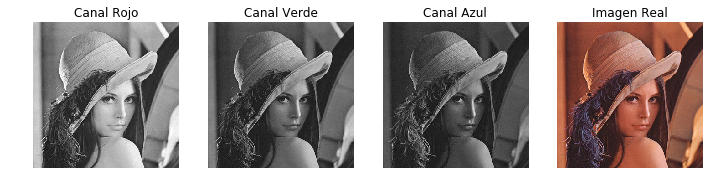

In [16]:
im = img.imread('jupyter_p2/lena.jpg')
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
plt.subplots(figsize = (12,9))
plt.subplot(141), plt.title('Canal Rojo'), plt.axis('off'), plt.imshow(R, cmap = 'gray')
plt.subplot(142), plt.title('Canal Verde'), plt.axis('off'), plt.imshow(G, cmap = 'gray')
plt.subplot(143), plt.title('Canal Azul'), plt.axis('off'), plt.imshow(B, cmap = 'gray')
plt.subplot(144), plt.title('Imagen Real'), plt.axis('off'), plt.imshow(im)
plt.show()

#### Como se puede apreciar, en la imagen no se ven los colores de los canales, si no que la intensidad que este color tendra en la suma global de esta siendo 255 (Blanco) lo máximo, y 0 (Negro) la ausencia de este.

### <u><center>Ahora un ejemplo de los canales en su "color"</center></u>


![lenna en canales](http://obsessive-coffee-disorder.com/wp-content/uploads/2014/02/lena-in-channels.png)

# · Pseudo Color

El pseudo color es cuando se le aplica color a una imagen en blanco y negro. Generalmente se utiliza para describir la intensidad de cada pixel con colores distintos.

Esto se puede lograr facilmente con la opcion cmap de la libreria <b>Matplotlib</b>

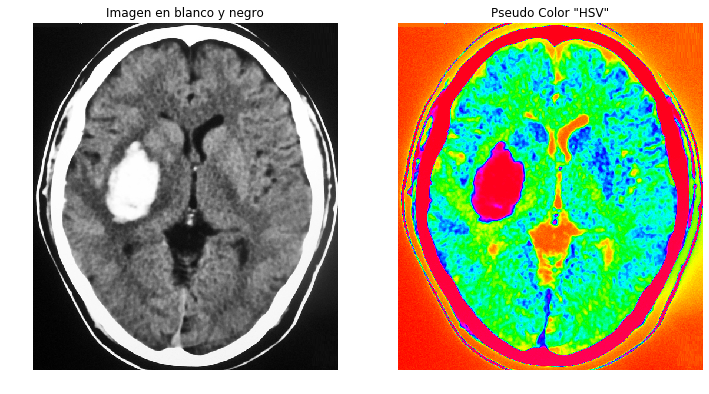

In [15]:
im = img.imread('jupyter_p2/brain_tumor.jpg')
plt.subplots(figsize = (12,9))
plt.subplot(121), plt.axis('off'), plt.title('Imagen en blanco y negro'), plt.imshow(im, cmap = 'gray')
plt.subplot(122), plt.axis('off'), plt.title('Pseudo Color "HSV"'), plt.imshow(im, cmap = 'hsv')
plt.show()

# · Pseudo Color (Hard Coded)

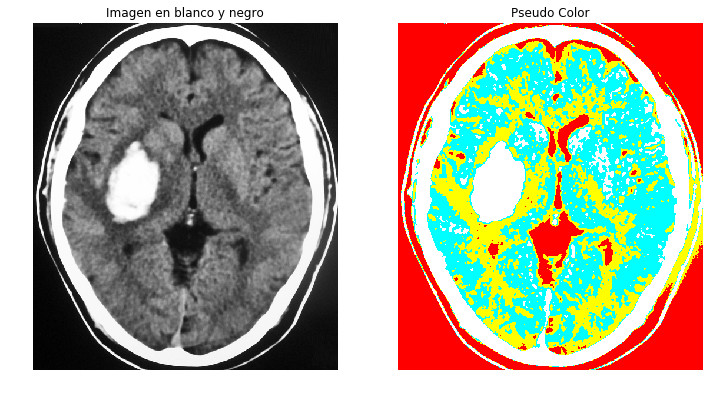

In [43]:
im = img.imread('jupyter_p2/brain_tumor.jpg')
color = np.zeros((nf,nc,3))
nf, nc = im.shape
for f in range(nf):
    for c in range(nc):
        pix = im[f,c]
        if pix <= 50:
            color[f,c,:] = [255, 0, 0]
        elif pix <= 100:
            color[f, c, :] = [255, 255, 0]
        elif pix <= 150:
            color[f, c, :] = [0, 255, 255]
        else:
            color[f, c, :] = [255,255,255]

            
plt.subplots(figsize = (12,9))
plt.subplot(121), plt.axis('off'), plt.title('Imagen en blanco y negro'), plt.imshow(im, cmap = 'gray')
plt.subplot(122), plt.axis('off'), plt.title('Pseudo Color'), plt.imshow(color / 255)
plt.show()

# · Espacios de Color y Gamut

![Espacio de color](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Colorspace.png/467px-Colorspace.png)

##### El espacio de color, es una representación gráfica de los colores que puede percibir el ojo humano. Fue decretada por la CIE en el año 1931.

##### El Gamut es la cantidad de color que un dispositivo puede reproducir (sRGB, Adobe RGB)

##### Longitudes de onda de referencia de los colores RGB :

<ul>
    <li> <b>Rojo : 700nm</b></li>
    <li> <b>Verde : 546.1nm</b></li>
    <li> <b>Azul : 435.6nm</b></li>
</ul>

# · Características de los colores

### Brillo:

##### Es la intensidad de los colores: Estos están situados al centro del diagrama de cromaticidad (Espacio de Color).

### HUE(Matiz):

##### Es un atributo asociado con la longitud de onda predominante en un color real (la mezcla de longitudes de onda).

### Saturación:

##### La saturación es la cantidad de luz blanca que posee el matiz. Es inversamente proporcional al color blanco.

##### Por ejemplo el punto central del espacio de color, tiene saturación = 0

# · Filtro de Color

##### A continuacion un ejemplo de segmentacion de color:

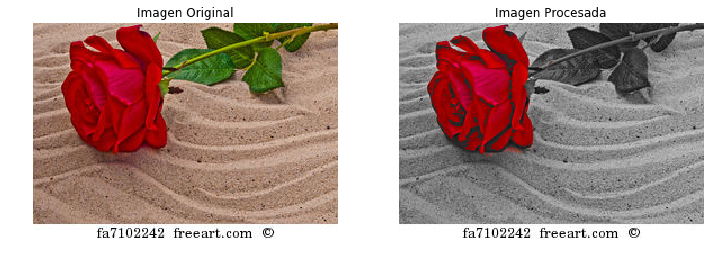

In [14]:
im = img.imread('jupyter_p2/flor.jpg')
im_procesada = im.copy()
R =  im[:, :, 0]
G = im[:, :, 1]
B = im[:, :, 2]
nf, nc = G.shape
for f in range(nf):
    for c in range(nc):
        d = (R[f, c] - 200)**2 + (G[f, c] - 5)**2 + (B[f, c] - 70)**2 #Linea que calcula la distancia entre colores
        if d > 100**2:
            gris = round((1.0 * R[f, c] + 1.0 * G[f, c] + 1.0 * B[f, c])/3)
            im_procesada[f, c, :] = [gris, gris, gris]
        else:
            im_procesada[f, c, :] = [R[f,c], G[f,c], B[f,c]]
plt.subplots(figsize = (12, 9))
plt.subplot(121), plt.axis('off'), plt.title('Imagen Original'), plt.imshow(im)
plt.subplot(122), plt.axis('off'), plt.title('Imagen Procesada'), plt.imshow(im_procesada)
plt.show()

# · Filtro por Saturación

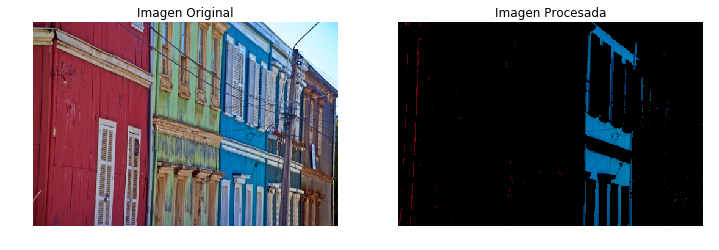

In [42]:
RGB = img.imread('jupyter_p2/_im_valpo.jpg')
nF, nC, n = RGB.shape
RGB2 = RGB.copy()

saturacion = 0.9

for f in range(nF):
    for c in range(nC):
        R = RGB[f, c, 0]
        G = RGB[f, c, 1]
        B = RGB[f, c, 2]
        if max(R,G,B) == 0:
            s = 0
        else:
            s = (max(R, G, B) - min(R, G, B)) / max(R, G, B)
        if s > saturacion:
            RGB2[f, c, :] = RGB[f, c, :]
        else:
            RGB2[f, c, :] = 0
plt.subplots(figsize = (12, 9))
plt.subplot(121), plt.axis('off'), plt.title('Imagen Original'), plt.imshow(RGB)
plt.subplot(122), plt.axis('off'), plt.title('Imagen Procesada'), plt.imshow(RGB2)
plt.show()    

# · Detección de Esquinas



Las esquinas se caracterizan por poseer un abrupto cambio en la direccion de la <b>gradiente</b>.

![gradiente](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRduVGIqZlxtgMgHFsL2NpVqW2nKlxBuQLqmF4zH2E_RWA2JjTg)

## $$ f_{x} = \frac{\partial f}{\partial x} = \begin{bmatrix} -1 & 0 & 1 \\-1 & 0 & 1 \\-1 & 0 & 1 \\ \end{bmatrix} \,\,\,\,\,\,\,\,\,\,\,f_{y} = \frac{\partial f}{\partial y} = \begin{bmatrix} -1 & -1 & -1 \\0 & 0 & 0 \\1 & 1 & 1 \\ \end{bmatrix}$$

##### Los vectores gradiente indican la dirección máxima de la derivada. La línea que "une" los vectores gradiente máximos corresponde a un "borde". Las esquinas son parte de los bordes. La característica de una esquina es que la dirección (ángulo) de los vectores gradientes cambias bruscamente: por ejemplo cambia 90º en pocos píxeles.


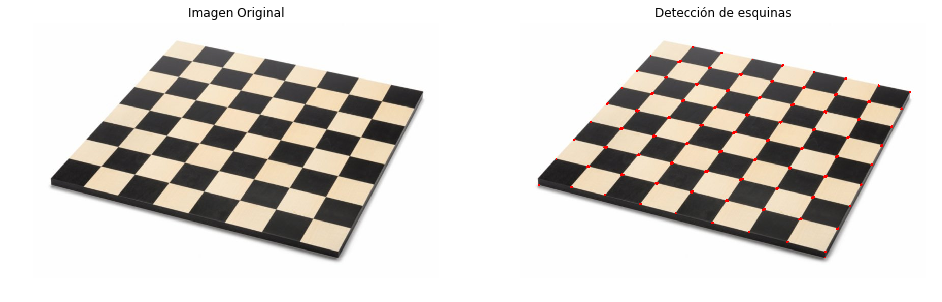

In [7]:
import cv2
import numpy as np

filename = 'jupyter_p2/chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
IM = img.copy()

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
IM = cv2.cvtColor(IM, cv2.COLOR_BGR2RGB)
plt.subplots(figsize = (16,9))

plt.subplot(121), plt.title('Imagen Original'), plt.axis('off'), plt.imshow(IM)
plt.subplot(122), plt.title('Detección de esquinas'), plt.axis('off'), plt.imshow(img)
plt.show()

# · Contornos ( Códigos de Cadena)

##### Un método corresponde a buscar “códigos de cadenas”. Corresponde a etiquetar los puntos de un borde, con el ángulo (índice) de su vecino siguiente, siguiendo el sentido del borde.


![codigos de cadena](jupyter_p2/cadena.png)

##### Para cada borde o segmento, luego de etiquetar con el número de vecino, se determina un histograma de los índices.

![vecinos](jupyter_p2/vecinos.png)

### Condiciones:

##### 1.- Si el histograma tiene valores en más de 4 índices --> no es recta

##### 2.- Si el histograma tiene valores sólo de 1 índice --> es una recta pura.

##### 3.- Si el hist. tiene 2 barras significativas:

    - Si son adyacentes, pero una supera notoriamente a la otra --> es recta.

    - Si no son adyacentes --> no es recta.

# · Transformada de Hough

##### La transformada de Hough se usa para el enlace de bordes y deteccion de rectas en una imagen, implica la transformacion de coordenadas a coordenadas polares.

## <center>$$ \rho = x \cos{\theta} + y \sin{\theta}$$</center>

![transformadaHough](http://imagebank.osa.org/getImage.xqy?img=M3cubGFyZ2Usb2UtOC05LTUwMy1nMDAx)

##### Sea: 
## $\begin{align} (x_{1}, x_{2})\end{align}$

##### Recta: 
## $\begin{align} y = ax + b\end{align}$

##### Donde: 

## $\begin{align} a = \frac{(y_{2}-y_{1})}{(x_{2}-x{1})} , b = y_{1} - \frac{(y_{2}-y_{1})}{(x_{2}-x{1})} x_{1} \end{align}$ 

### Distancia al origen:

## $\begin{align} d = \sqrt{(x - 0)^2 + (y + 0)^2}\end{align}$ 

## $\begin{align} d' = x^2 + (ax + b)^2 = x^2 + a^2x^2 + 2abx + b^2\end{align}$ 

## $\begin{align} x_{0} = \frac{-ab}{1 + a^2} , y_{0} = b - \frac{a^2b}{1 + a^2}\end{align}$ 

### Ecuacion Polar:

## $\begin{align} \rho = \sqrt{x_{0} + y_{0}} , \theta = arctan(\frac{y_{0}}{x_{0}})\end{align}$ 

#### Ejemplo:

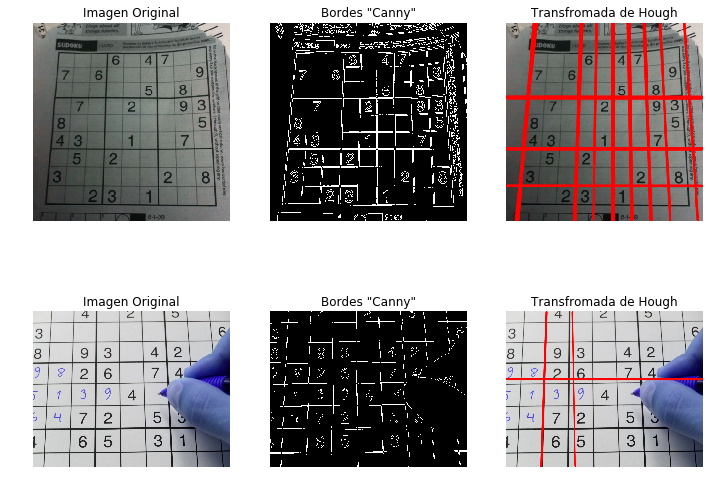

In [163]:
im = cv2.imread('jupyter_p2/sudoku2.jpg',1)
im2 = im.copy()
IM = cv2.imread('jupyter_p2/sudoku3.jpg',1)
IM2 = IM.copy()
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
GRAY = cv2.cvtColor(IM,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,200,apertureSize = 3)
EDGES = cv2.Canny(GRAY,50,200,apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200, None, 0, 0)
LINES = cv2.HoughLines(EDGES, 1, np.pi / 180, 300, None, 0, 0)
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(im2, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
for x in range(0, len(LINES)):
    rho = lines[x][0][0]
    theta = lines[x][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(IM2, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
plt.subplots(figsize = (12,9))
plt.subplot(231), plt.title('Imagen Original'), plt.axis('off'), plt.imshow(im)
plt.subplot(232), plt.title('Bordes "Canny"'), plt.axis('off'), plt.imshow(edges, cmap = 'gray')
plt.subplot(233), plt.title('Transfromada de Hough'), plt.axis('off'), plt.imshow(im2)
plt.subplot(234), plt.title('Imagen Original'), plt.axis('off'), plt.imshow(IM)
plt.subplot(235), plt.title('Bordes "Canny"'), plt.axis('off'), plt.imshow(EDGES, cmap = 'gray')
plt.subplot(236), plt.title('Transfromada de Hough'), plt.axis('off'), plt.imshow(IM2)
plt.show()

# · Centroide

# · Firmas (Signatures)

Otro método consiste en determinar la función o curva de firma de un objeto.

Una de las funciones de firma más comunes es la distancia de los puntos del borde al centro del objeto.

Las firmas de los objetos se deben normalizar en el eje y, para comparar objetos de igual forma pero de distinto tamaño.

![firma Circulo](jupyter_p2/firmaCirculo2.png)
![firma cuadrado](jupyter_p2/firmaCuadrado.png)
![firma poligono](jupyter_p2/firmaPoli.png)

# · Compresión

• Hay diferencia entre información y datos.

• En muchas ocasiones se utilizan como sinónimos y no lo son.

• Los datos son una forma representar la información.

Una misma información puede ser representada por distintas cantidades de datos.

Por tanto, algunas representaciones de la misma información contienen datos redundantes.

La compresión de datos se define como: <font color = "purple"><b>el proceso de reducir la cantidad de datos necesarios para representar eficazmente una información</b></font>, es decir, la eliminación de datos redundantes.

En el caso de las imágenes, existen tres maneras de reducir el número de datos redundantes:
    
#### <font color = "red">• Eliminar código redundante</font>

#### <font color = "green">• Eliminar píxeles redundantes</font>

#### <font color = "blue">• Eliminar redundancia visual</font>

# <font color = "red">· Codigo Redundante</font>

El código de una imagen representa el cuerpo de la información mediante un conjunto de símbolos.

La eliminación del código redundante consiste en utilizar el menor número de símbolos para representar la información.

# <font color = "green"> · Píxeles Redundantes </font>

La mayoría de las imágenes presentan semejanzas o correlaciones entre sus píxeles.

Estas correlaciones se deben a la existencia de estructuras similares en las imágenes, puesto que no son completamente aleatorias.

De esta manera, el valor de un píxel puede emplearse para predecir el de sus vecinos.

# <font color = "blue"> · Redundancia Visual </font>

El ojo humano responde con diferente sensibilidad a la información visual que recibe.

La información a la que es menos sensible se puede descartar sin afectar a la percepción de la imagen.

Se suprime así lo que se conoce como redundancia visual.

#### Este es el método mas Utilizado ( .jpg )

# Metodos de compresión

Existen 2 tipos de métodos de compresión: el Lossless ( sín pérdidas ) y el Lossy ( con pérdidas ).

![jpegcomp](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Webp_-_Jpeg_-_Lossless_comparative.png/1024px-Webp_-_Jpeg_-_Lossless_comparative.png)

# · Compresión sin pérdida RLE ( Run Length Encoding )

consiste en sustituir series de valores repetidos por una clave con indicador numérico.

![rle](jupyter_p2/rle.png)

# · Compresión sin pérdida LZ ( Lampel - Ziv )

El sistema adaptativo LZ (Lempel-Ziv), del que deriva el LZW (Lempel-Ziv-Welch), es más ingenioso y consigue, en una lectura única, codificar repeticiones sin crear una tabla de códigos.

Cuando se localiza una secuencia similar a otra anterior, se sustituye por una clave de dos valores: los correspondientes a cuántos pasos se retrocede y cuántos datos se repiten.

#### El formato GIF y TIFF utilizan este algoritmo, generalmente ahorra 1/3 del archivo

![lz](jupyter_p2/lz2.png)

## <font color = "red">· #3 2 significa retroceder tres píxeles y repetir dos</font>

## <font color = "blue">· #12 7 significa retroceder 12 píxeles y repetir siete</font>

# · Redes Neuronales

# · Proceso de Aprendizaje

## $\begin{align}Sea: d(x) = clase \, del\,vector \, x = \begin{cases} 1 \\ -1\end{cases} \end{align}$

##### <font color = "red">PASO 0:</font> Comenzar con valores aleatorios para pesos y umbral.

##### <font color = "red">PASO 1:</font> Seleccionar un ejemplo X del conjunto de entrenamiento.

##### <font color = "red">PASO 2:</font> Si y<>d(x), modificar wi de acuerdo con:

## $\begin{align}\Delta W_{i} = d(x) x_{i}\end{align}$

##### <font color = "red">PASO 3:</font> Si no se ha cumplido el criterio de finalización, volver a <font color = "red">1</font>

# · Se define la funcion de activacion

In [1]:
#Función de Acrivación
def FActivacion(entradas, pesos, umb):
    s = 0
    L = len(entradas)
    for i in range(L):
        s = s + entradas[i] * pesos[i]
    s = s + umb * 1
    if s > 0:
        return 1
    else:
        return -1

# · Creación del Perceptrón

In [3]:
#Perceptron
CLASE = np.array([1,1,1,1,-1,-1,-1,-1]) #Respuesta Correcta
PESOS = np.random.rand(1024)
UMB = np.random.rand(1)

# · Entrenamiento del Perceptrón

In [8]:
#Lectura de los Ejemplos
for it in range(3):
    for i in range(8):
        #print('n' + str(i + 1) + '.bmp')
        IM = img.imread('jupyter_img/f' + str(i + 1) + '.bmp')
        BN = IM[:,:,0]
        CAPA_ENTRADA = BN.reshape((1024, 1))
        respuesta = FActivacion(CAPA_ENTRADA, PESOS, UMB)
        if respuesta != CLASE[i]:
            print('Error!')
            for j in range(1024):
                PESOS[j] = PESOS[j] + CLASE[i] * CAPA_ENTRADA[j]
                UMB = UMB + CLASE[i] * 1
        else:
            print('BIEN')
        print(it + 1, i + 1, respuesta)

BIEN
1 1 1
BIEN
1 2 1
BIEN
1 3 1
Error!
1 4 -1
BIEN
1 5 -1
BIEN
1 6 -1
BIEN
1 7 -1
BIEN
1 8 -1
BIEN
2 1 1
BIEN
2 2 1
BIEN
2 3 1
BIEN
2 4 1
BIEN
2 5 -1
BIEN
2 6 -1
BIEN
2 7 -1
BIEN
2 8 -1
BIEN
3 1 1
BIEN
3 2 1
BIEN
3 3 1
BIEN
3 4 1
BIEN
3 5 -1
BIEN
3 6 -1
BIEN
3 7 -1
BIEN
3 8 -1


# · Se le pregunta al Algoritmo

Es un 1 :-)


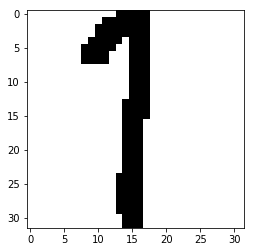

In [9]:
IM = img.imread('jupyter_img/siete.bmp')
BN = IM[:,:,0]
CAPA_ENTRADA = BN.reshape((1024, 1))
respuesta = FActivacion(CAPA_ENTRADA, PESOS, UMB)
if respuesta == -1:
    print('Es un 1 :-)')
else:
    print('Es un 7 :-)')
plt.imshow(IM, cmap = 'gray')
plt.show()

Es un 7 :-)


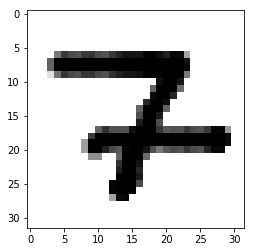

In [10]:
IM = img.imread('jupyter_img/uno.bmp')
BN = IM[:,:,0]
CAPA_ENTRADA = BN.reshape((1024, 1))
respuesta = FActivacion(CAPA_ENTRADA, PESOS, UMB)
if respuesta == -1:
    print('Es un 1 :-)')
else:
    print('Es un 7 :-)')
plt.imshow(IM, cmap = 'gray')
plt.show()

# · Imagen resumen de el Perceptrón

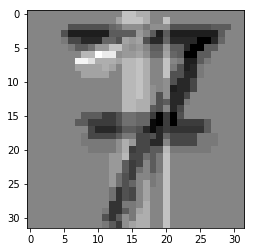

In [11]:
plt.imshow(PESOS.reshape((32,32)), cmap = 'gray')
plt.show()

# · Perceptrón ADALINE

##### ADALINE (ADAptive LInear NEuron): Neuron Lineal Adaptativo

La salida del perceptrón es <b><u>binaria</u></b>.

La regla de aprendizaje del perceptrón <b><u>no mide el grado de “error”</u></b>.

#### Widrow & Hoff, 1960 proponen ADALINE.

###### Consiste simplemente en una transformación que permite adaptar una entrada X a una salida Y.

# $$\overrightarrow{y} = \displaystyle\sum_{i=1}^{n} w_i x_i + \sigma$$

La regla de aprendizaje de ADALINE considera el error entre la
salida lograda <b><font color = "red">y</b></font> versus la salida deseada <b><font color = "red">d</b></font>

#  $$|\overrightarrow{d} - \overrightarrow{y}| $$

Esta regla se conoce como <b>REGLA DELTA</b>

# $$ \Delta W_i = \alpha \displaystyle\sum_{\forall p} (d_p - y_p)x_i$$

La constante se denomina <b>TASA DE APRENDIZAJE</b>
## Pasos Perceptrón ADALINE
1. Inicializar los pesos en forma aleatoria
2. Introducir PATRON de entrada
3. Calcular salida Y, y obtener diferencia $\begin{align} \displaystyle\sum_{\forall p} (d_p - y_p)\end{align}$
4. Para todos los pesos, multiplizar dicha diferencia por la entrada correspondiente y ponderarla por la tasa 
5. Actualizar todos los pesos $\begin{align}w_i= w_i + \Delta w_i\end{align}$
6. Si no se ha cumplido el criterio de convergencia, regresar a
2. Si se han acabado todos los patrones, empezar de nuevo a introducir patrones.



![adaline](jupyter_p2/adaline.png)

# · Algoritmos Genéticos

### Algoritmo:
#### 1. Inicializar aleatoriamente una población de soluciones a un problema, representadas por una estructura de datos adecuada.
#### 2. Evaluar cada una de las soluciones, y asignarle una puntuación u orden según lo bien que lo hayan hecho.
#### 3. SELECCIÓN NATURAL: Escoger de la población la parte que tenga una puntuación mayor.
#### 4. MUTACION Y CROSSOVER: mutar y entrecruzar las diferentes soluciones de esa parte escogida, para reconstruir la población.
#### 5. Repetir un número determinado de veces, o hasta que se haya encontrado la solución deseada.



![gen](jupyter_p2/gen.png)

In [13]:
import numpy as np
import time
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

#Vectores 6 compuestos solo de numeros pares, positivos
#sin numeros repetidos
#cuya suma total sea la menor posible

def AZAR():
    CR=np.zeros((7))
    for c in range(1,7):
        CR[c]=np.random.randint(-100,100)
    return CR

def MUTAR(CR):
    gen=np.random.randint(0,6)
    CR[gen]=np.random.randint(-100,100)
    return CR

def CRUZAR(CR1,CR2):
    return np.concatenate([CR1,CR2])

def EVAL(CR):
    s=0
    L=set()
    for i in range(6):
        s=s+CR[i]
        if (CR[i]%2)!=0: #castiga los impares
            s=s+1000000
        if (CR[i]<0): #castiga los negativos
            s=s+1000000
        L.add(CR[i])
    if len(L)<6: #castiga los repetidos
        s=s+(6-len(L))*1000000
    return s

#PASO 1: Generar poblacion al azar
POBLACION=np.zeros((10,7))
nf,nc=POBLACION.shape
for f in range(nf):
    for c in range(1,nc):
        POBLACION[f,c]=np.random.randint(-100,100)

print(POBLACION)
time.sleep(2)

for it in range(1000):
    for f in range(nf):
        POBLACION[f,0]=EVAL(POBLACION[f,1:7])
    POBLACION=POBLACION[np.lexsort(np.fliplr(POBLACION).T)] 


    POBLACION[5,1:7]=MUTAR(POBLACION[0,1:7].copy())
    POBLACION[6,1:7]=CRUZAR(POBLACION[0,1:4].copy(),POBLACION[1,4:7].copy())
    POBLACION[7,1:7]=CRUZAR(POBLACION[0,4:7].copy(),POBLACION[2,1:4].copy())
    POBLACION[8,:]=AZAR()
    POBLACION[9,:]=AZAR()

print("it:",it)
print(POBLACION)

[[  0.  -4. -56. -15.  83. -87. -38.]
 [  0.  -7. -68. -70. -83.  52. -51.]
 [  0.  52. -88.  15. -87.  82.  18.]
 [  0.  56.  17. -41.  82.  34. -85.]
 [  0.  93.  96.  14.  10. -41. -55.]
 [  0.  23. -23.  48.  -4.   9.   2.]
 [  0.  82. -41.  34.  47. -56. -95.]
 [  0.  80.  48.  95.   9. -37.  47.]
 [  0.   5. -32.  59.  66. -26. -10.]
 [  0. -46. -88.  12.  28.  64. -15.]]
it: 999
[[     30.       0.       4.       6.      10.       2.       8.]
 [     30.       0.       4.       6.      10.       2.       8.]
 [     30.       0.       4.       6.      10.       2.       8.]
 [     30.       0.       4.       6.      10.       2.       8.]
 [     30.       0.       4.       6.      10.       2.       8.]
 [     30.       0.       4.       6.      45.       2.       8.]
 [     30.       0.       4.       6.      10.       2.       8.]
 [1000123.      10.       2.       8.       0.       4.       6.]
 [      0.     -50.     -70.     -77.      15.      79.      81.]
 [      0.      6